# ***CODE CLAUSE PROJECT***

## ***PROJECT NAME - Market Basket Analysis in Python using Apriori Algorithm***
 

### ***Importing Libraries***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# for market basket analysis
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

### ***Importing Datasets***

In [2]:
df = pd.read_excel("Online Retail.xlsx")

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
print('Shape of data:\n', df.shape)

Shape of data:
 (541909, 8)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

### Data Preprocessing

In [8]:
df[df['Quantity']<0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [9]:
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

In [10]:
df = df[~df['InvoiceNo'].str.contains('C',na=False)]


In [11]:
df['InvoiceNo']

0         536365
1         536365
2         536365
3         536365
4         536365
           ...  
541904    581587
541905    581587
541906    581587
541907    581587
541908    581587
Name: InvoiceNo, Length: 532621, dtype: object

We add column with an year, month and hour of each transaction:

In [12]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Hour'] = df['InvoiceDate'].dt.hour


In [13]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,8


In [14]:
df['Month_year'] = pd.to_datetime(df['InvoiceDate']).dt.to_period('M')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Hour,Month_year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,8,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,8,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,8,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,8,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,8,2010-12


We count the income (revenues):

We assigns the product of quantity and price to the Income column and we use round function to rounding the two decimal places. We receive revenues for every product.

In [15]:
df['Income'] = round(df['Quantity'] * df['UnitPrice'],2)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Hour,Month_year,Income
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,8,2010-12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,8,2010-12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,8,2010-12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,8,2010-12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,8,2010-12,20.34


## ***Exploratory Data Analysis (EDA)***

### Summary statistic:


In [16]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Year,Month,Hour,Income
count,532621.000000,532621,532621.000000,397924.000000,532621.000000,532621.000000,532621.000000,532621.000000
mean,10.239972,2011-07-04 17:06:10.804305920,3.847621,15294.315171,2010.921608,7.557864,13.077451,19.985244
min,-9600.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,2010.000000,1.000000,6.000000,-11062.060000
25%,1.000000,2011-03-28 12:13:00,1.250000,13969.000000,2011.000000,5.000000,11.000000,3.750000
50%,3.000000,2011-07-20 11:54:00,2.080000,15159.000000,2011.000000,8.000000,13.000000,9.900000
75%,10.000000,2011-10-19 12:21:00,4.130000,16795.000000,2011.000000,11.000000,15.000000,17.700000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000,2011.000000,12.000000,20.000000,168469.600000
std,159.593551,NaN,41.758023,1713.169877,0.268787,3.508729,2.438535,270.574241


In [17]:
df[df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Hour,Month_year,Income
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom,2010,12,16,2010-12,-0.0
4347,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.0,NaN,United Kingdom,2010,12,14,2010-12,-0.0
7188,536996,22712,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom,2010,12,15,2010-12,-0.0
7189,536997,22028,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom,2010,12,15,2010-12,-0.0
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,0.0,NaN,United Kingdom,2010,12,15,2010-12,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,2011-12-07 18:36:00,0.0,NaN,United Kingdom,2011,12,18,2011-12,-0.0
535335,581212,22578,lost,-1050,2011-12-07 18:38:00,0.0,NaN,United Kingdom,2011,12,18,2011-12,-0.0
535336,581213,22576,check,-30,2011-12-07 18:38:00,0.0,NaN,United Kingdom,2011,12,18,2011-12,-0.0
536908,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,NaN,United Kingdom,2011,12,9,2011-12,-0.0


### ***Exploring the variables***

##### ***Checking he quantity above 100:***

In [18]:
df[df['Quantity']>100].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Hour,Month_year,Income
96,536378,21212,PACK OF 72 RETROSPOT CAKE CASES,120,2010-12-01 09:37:00,0.42,14688.0,United Kingdom,2010,12,9,2010-12,50.40
178,536387,79321,CHILLI LIGHTS,192,2010-12-01 09:58:00,3.82,16029.0,United Kingdom,2010,12,9,2010-12,733.44
179,536387,22780,LIGHT GARLAND BUTTERFILES PINK,192,2010-12-01 09:58:00,3.37,16029.0,United Kingdom,2010,12,9,2010-12,647.04
180,536387,22779,WOODEN OWLS LIGHT GARLAND,192,2010-12-01 09:58:00,3.37,16029.0,United Kingdom,2010,12,9,2010-12,647.04
181,536387,22466,FAIRY TALE COTTAGE NIGHTLIGHT,432,2010-12-01 09:58:00,1.45,16029.0,United Kingdom,2010,12,9,2010-12,626.40


C:\Users\USER\AppData\Local\Temp\ipykernel_15128\2586449991.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Quantity'])


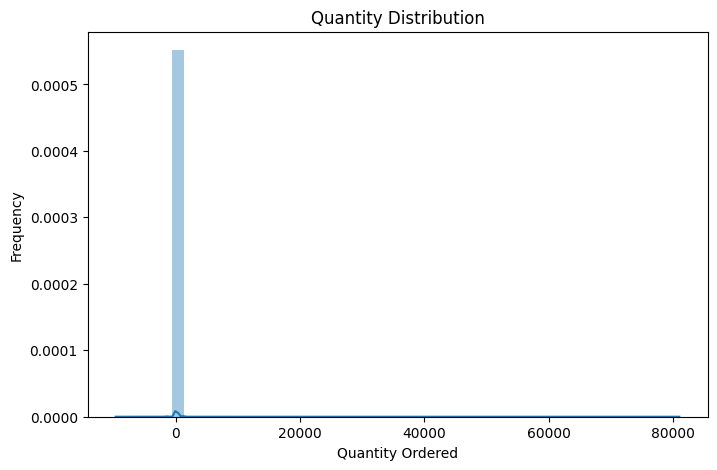

In [19]:
plt.figure(figsize=(8,5))
sns.distplot(df['Quantity'])
plt.title('Quantity Distribution')
plt.xlabel('Quantity Ordered')
plt.ylabel('Frequency')
plt.show();

In [20]:
df[df['Quantity'] > 70000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Hour,Month_year,Income
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,2011,1,10,2011-01,77183.6
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,2011,12,9,2011-12,168469.6


In [21]:
{
    'prct99.9': np.percentile(df['Quantity'], 99.9),
    'prct99': np.percentile(df['Quantity'], 99),
    'prct90': np.percentile(df['Quantity'], 90),
    'prct80': np.percentile(df['Quantity'], 80),
    'prct70': np.percentile(df['Quantity'], 70),
    'prct50': np.percentile(df['Quantity'], 50),
}

{'prct99.9': 480.0,
 'prct99': 100.0,
 'prct90': 24.0,
 'prct80': 12.0,
 'prct70': 8.0,
 'prct50': 3.0}

UnitPrice

C:\Users\USER\AppData\Local\Temp\ipykernel_15128\1263336028.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['UnitPrice'])


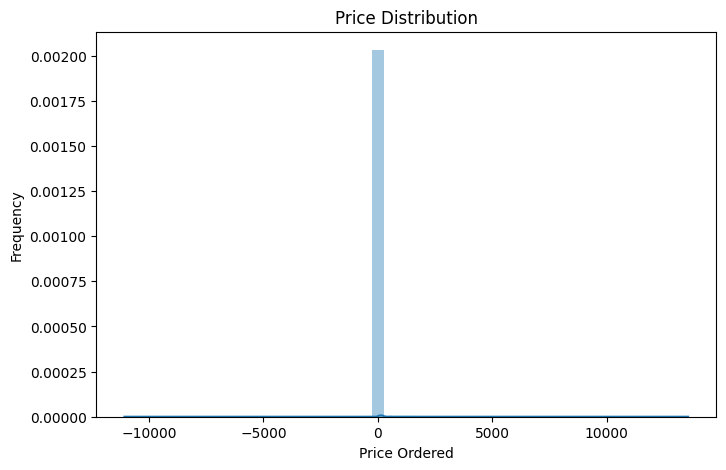

In [22]:
plt.figure(figsize=(8,5))
sns.distplot(df['UnitPrice'])
plt.title('Price Distribution')
plt.xlabel('Price Ordered')
plt.ylabel('Frequency')
plt.show()

### StockCode

In [23]:
products = df['StockCode'].nunique()
print(products)

4059


In [24]:
products_group = df[['CustomerID', 'StockCode']].groupby('CustomerID').count().sort_values('StockCode', axis=0, ascending=False)
products_group.head(10)

,StockCode
CustomerID,
17841.0,7847
14911.0,5677
14096.0,5111
12748.0,4596
14606.0,2700
15311.0,2379
14646.0,2080
13089.0,1818
13263.0,1677


### List of unique countries:

In [25]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Bahrain', 'Israel', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [26]:
df[df['Country']=='Poland'].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Hour,Month_year,Income
6608,536971,21733,RED HANGING HEART T-LIGHT HOLDER,32,2010-12-03 13:40:00,2.55,12779.0,Poland,2010,12,13,2010-12,81.60
6609,536971,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2010-12-03 13:40:00,1.25,12779.0,Poland,2010,12,13,2010-12,30.00
6610,536971,37446,MINI CAKE STAND WITH HANGING CAKES,8,2010-12-03 13:40:00,1.45,12779.0,Poland,2010,12,13,2010-12,11.60
6611,536971,37448,CERAMIC CAKE DESIGN SPOTTED MUG,24,2010-12-03 13:40:00,1.49,12779.0,Poland,2010,12,13,2010-12,35.76
6612,536971,21700,BIG DOUGHNUT FRIDGE MAGNETS,24,2010-12-03 13:40:00,0.85,12779.0,Poland,2010,12,13,2010-12,20.40


### InvoiceNo

In [27]:
df['InvoiceNo'].nunique()

22064

In [28]:
country_group = df[['Country', 'InvoiceNo']].groupby('Country').count().sort_values('InvoiceNo', axis=0, ascending=False)
country_group

,InvoiceNo
Country,
United Kingdom,487622
Germany,9042
France,8408
EIRE,7894
Spain,2485
Netherlands,2363
Belgium,2031
Switzerland,1967
Portugal,1501


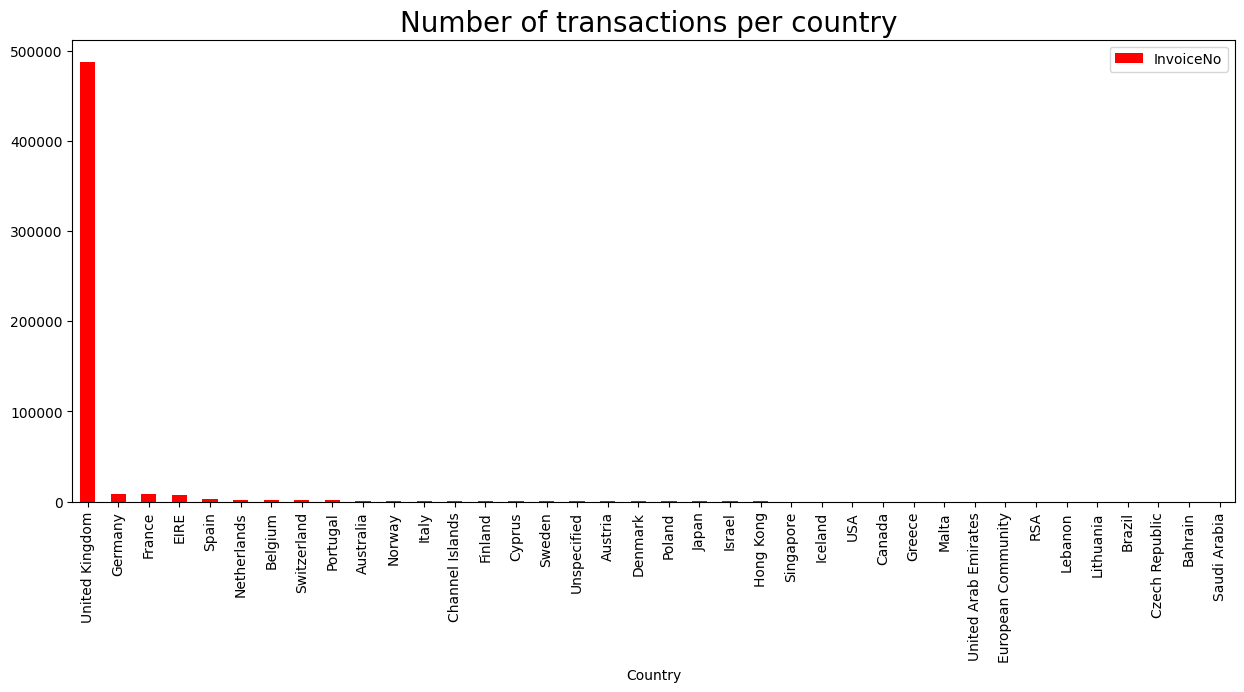

In [29]:
plt.rcParams['figure.figsize'] = (15, 6)
color = plt.cm.magma(np.linspace(0, 1, 40))
country_group.plot.bar(color = 'red')
plt.title('Number of transactions per country ', fontsize=20)
plt.xticks(rotation=90)
plt.show()

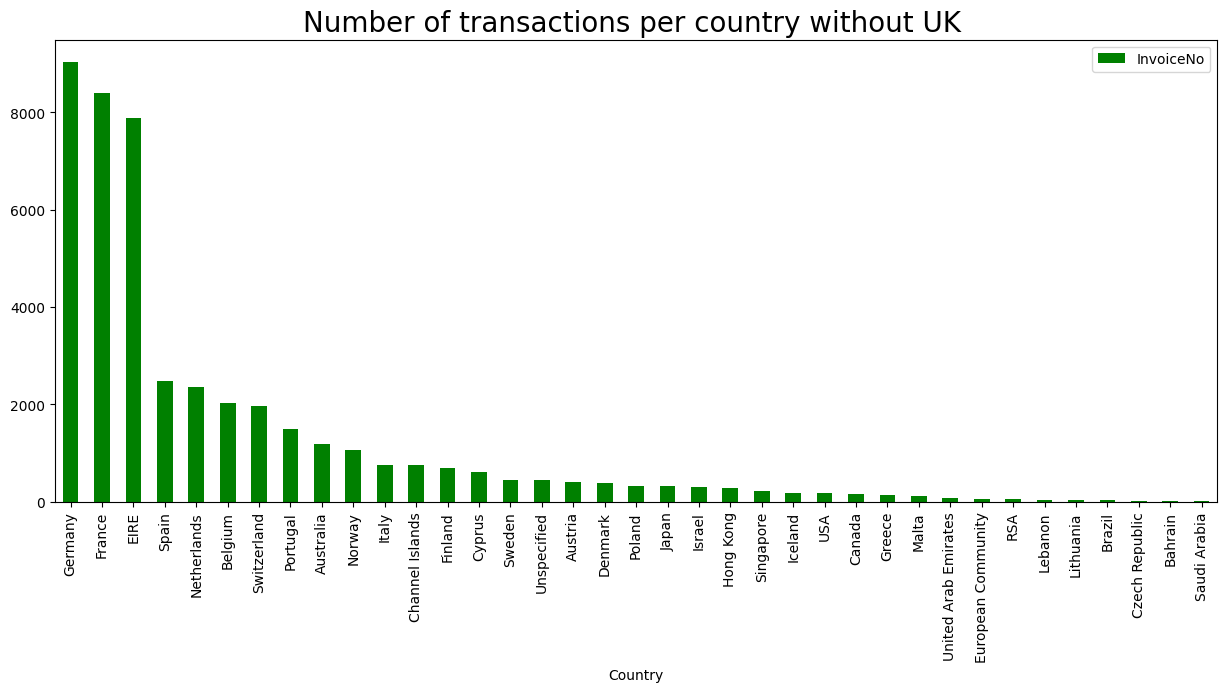

In [30]:
plt.rcParams['figure.figsize'] = (15, 6)
color = plt.cm.magma(np.linspace(0, 1, 40))
country_group[country_group.index != 'United Kingdom'].plot.bar(color='green')
plt.title('Number of transactions per country without UK ', fontsize=20)
plt.xticks(rotation =90)
plt.show()

From diagrams that the most customers comes from United Kingdom - almost 500 000 orders. The rest of the world have much fewer orders. The most comes from Germany and France.

### Description

Descriptions of products:

In [31]:
df['Description'].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'lost',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [32]:
df['Description'].value_counts().head(10)

Description
WHITE HANGING HEART T-LIGHT HOLDER    2327
JUMBO BAG RED RETROSPOT               2115
REGENCY CAKESTAND 3 TIER              2019
PARTY BUNTING                         1707
LUNCH BAG RED RETROSPOT               1594
ASSORTED COLOUR BIRD ORNAMENT         1489
SET OF 3 CAKE TINS PANTRY DESIGN      1399
PACK OF 72 RETROSPOT CAKE CASES       1370
LUNCH BAG  BLACK SKULL.               1328
NATURAL SLATE HEART CHALKBOARD        1263
Name: count, dtype: int64

In [33]:
df[df['Description']=='WHITE HANGING HEART T-LIGHT HOLDER'].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Hour,Month_year,Income
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,8,2010-12,15.3
49,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850.0,United Kingdom,2010,12,9,2010-12,15.3
66,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:32:00,2.55,17850.0,United Kingdom,2010,12,9,2010-12,15.3
220,536390,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,2010-12-01 10:19:00,2.55,17511.0,United Kingdom,2010,12,10,2010-12,163.2
262,536394,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2010-12-01 10:39:00,2.55,13408.0,United Kingdom,2010,12,10,2010-12,81.6


In [34]:
desc = df['Description'].value_counts().head(20)

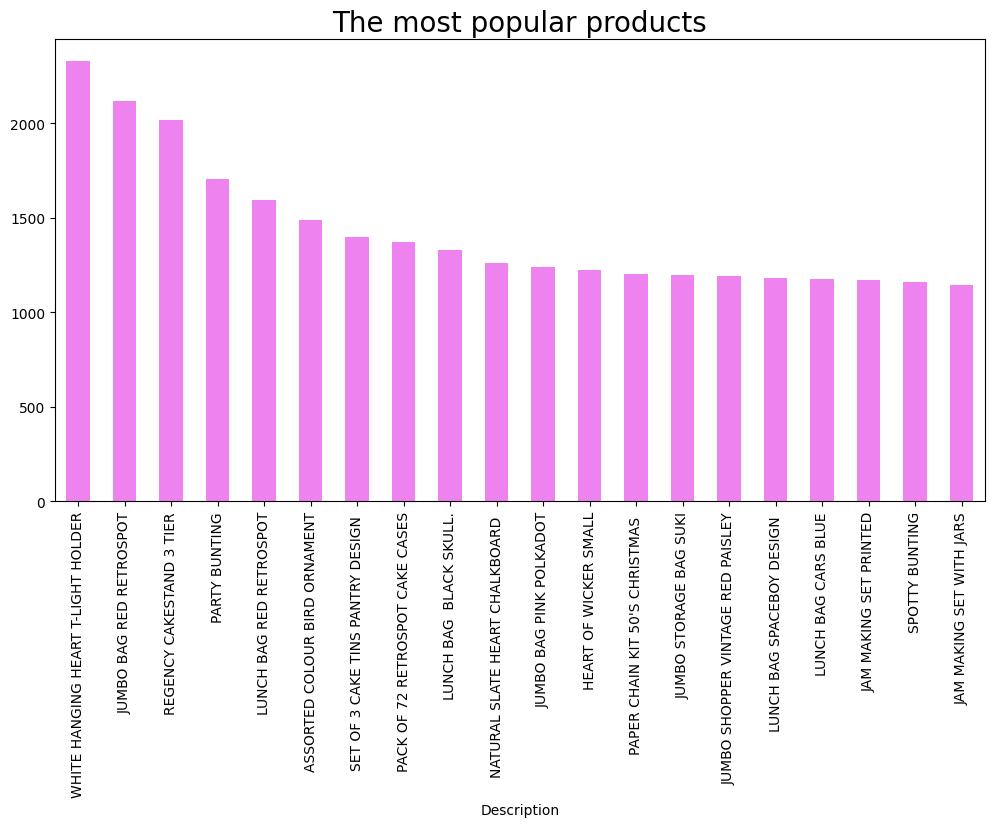

In [35]:
plt.rcParams['figure.figsize']=(12, 6)
color = plt.cm.magma(np.linspace(0, 1, 40))
desc.plot.bar(color='violet')
plt.title('The most popular products', fontsize=20)
plt.xticks(rotation=90)
plt.show()

The most popular product is WHITE HANGING HEART T-LIGHT HOLDER.

### ***CustomerID***

In [36]:
df['CustomerID'].nunique()

4339

In [37]:
df[df['CustomerID'] == '00000'].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Hour,Month_year,Income


In [38]:
customer_group = df[['CustomerID', 'InvoiceNo']].groupby('CustomerID').count().sort_values('InvoiceNo', axis=0, ascending=False)
customer_group.head(10)

,InvoiceNo
CustomerID,
17841.0,7847
14911.0,5677
14096.0,5111
12748.0,4596
14606.0,2700
15311.0,2379
14646.0,2080
13089.0,1818
13263.0,1677


### Analyzing KPIs

In [39]:
df.groupby('Country')['Income'].sum().sort_values(ascending=False).head(10)

Country
United Kingdom    9003097.96
Netherlands        285446.34
EIRE               283453.96
Germany            228867.14
France             209715.11
Australia          138521.31
Spain               61577.11
Switzerland         57089.90
Belgium             41196.34
Sweden              38378.33
Name: Income, dtype: float64

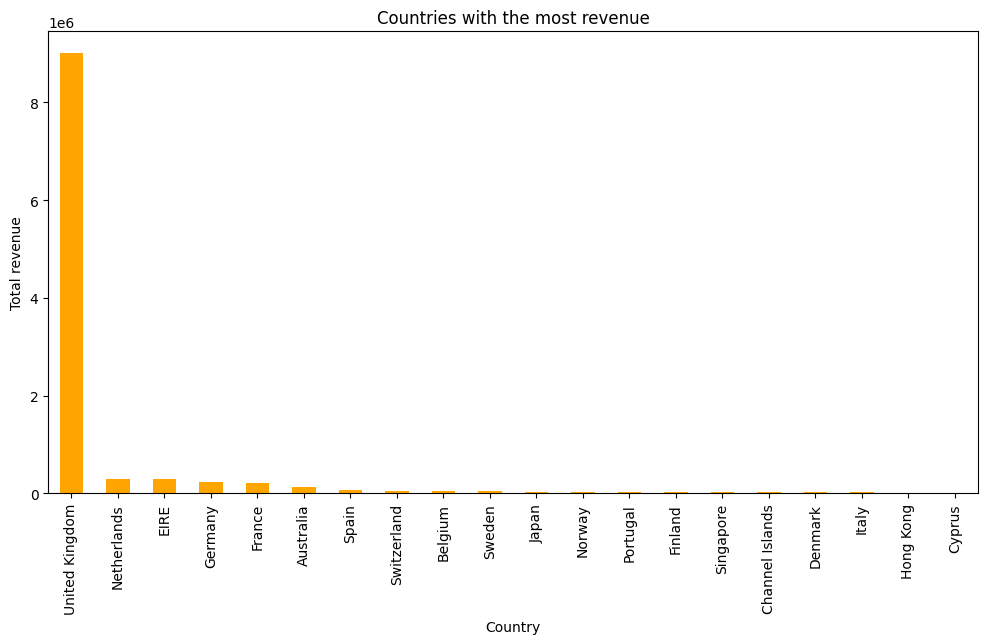

In [40]:
plt.figure(figsize=(12,6))
cities = df.groupby('Country')['Income'].sum().sort_values(ascending=False).head(20)
cities.plot(kind = 'bar', color='orange')
plt.title('Countries with the most revenue')
plt.xlabel('Country')
plt.ylabel('Total revenue')
plt.show()

In [41]:
df.groupby('Description')['Income'].sum().sort_values(ascending=False).head(10)

Description
DOTCOM POSTAGE                        206248.77
REGENCY CAKESTAND 3 TIER              174484.74
PAPER CRAFT , LITTLE BIRDIE           168469.60
WHITE HANGING HEART T-LIGHT HOLDER    106292.77
PARTY BUNTING                          99504.33
JUMBO BAG RED RETROSPOT                94340.05
MEDIUM CERAMIC TOP STORAGE JAR         81700.92
Manual                                 78112.82
POSTAGE                                78101.88
RABBIT NIGHT LIGHT                     66964.99
Name: Income, dtype: float64

 #### Annual Revenue

In [42]:
df.groupby(['Year'])['Income'].sum()

Year
2010     823746.14
2011    9820814.28
Name: Income, dtype: float64

Monthly Revenue

In [43]:
df.groupby(['Month_year'])['Income'].sum()

Month_year
2010-12     823746.14
2011-01     691364.56
2011-02     523631.89
2011-03     717639.36
2011-04     537808.62
2011-05     770536.02
2011-06     761739.90
2011-07     719221.19
2011-08     737014.26
2011-09    1058590.17
2011-10    1154979.30
2011-11    1509496.33
2011-12     638792.68
Freq: M, Name: Income, dtype: float64

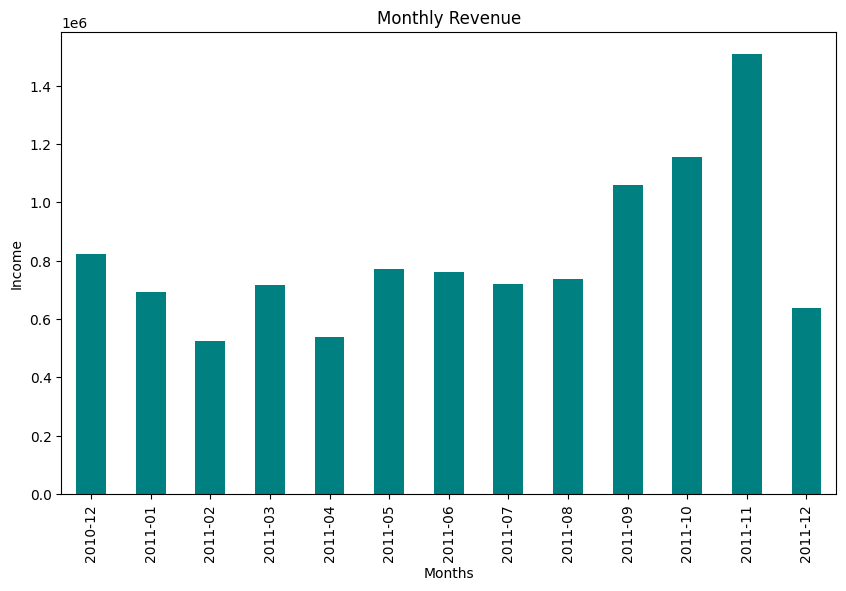

In [44]:
plt.figure(figsize=(10,6))
df.groupby(['Month_year'])['Income'].sum().plot(kind='bar', color='teal');
plt.title('Monthly Revenue')
plt.xlabel('Months')
plt.ylabel('Income')
plt.show()

In [45]:
month = df.groupby(['Month_year'])['Income'].sum()

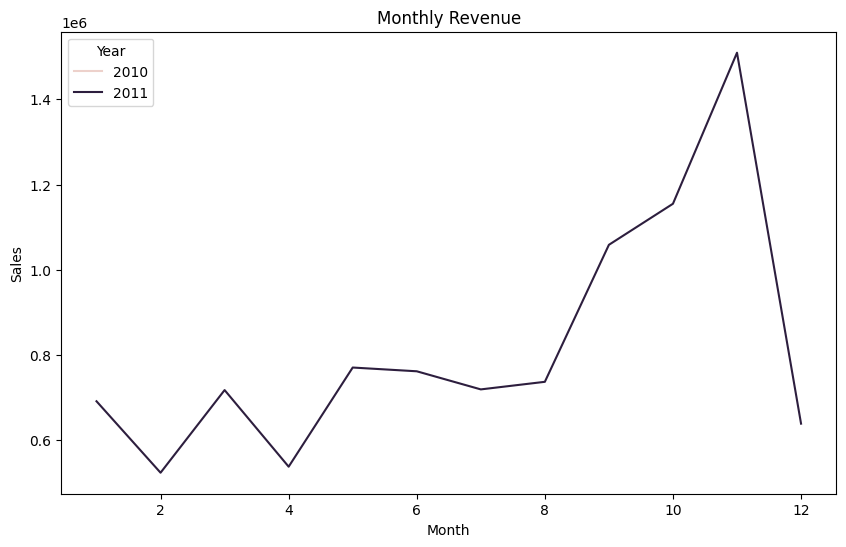

In [46]:
plt.figure(figsize=(10,6))
monthly_revenue = df.groupby(["Year", "Month"])["Income"].sum().reset_index()
monthly_revenue
sns.lineplot(x="Month", y="Income",hue="Year", data=monthly_revenue)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Revenue')
plt.show()

#### Revenues of Customers

In [47]:
cust = df[['CustomerID','Income']].groupby('CustomerID').mean().sort_values('Income', ascending=False).head(10)
cust

,Income
CustomerID,
12346.0,77183.600000
16446.0,56157.500000
15098.0,13305.500000
15749.0,4453.430000
15195.0,3861.000000
13135.0,3096.000000
17846.0,2033.100000
18087.0,2027.860000
16532.0,1687.200000


<Figure size 1000x600 with 0 Axes>

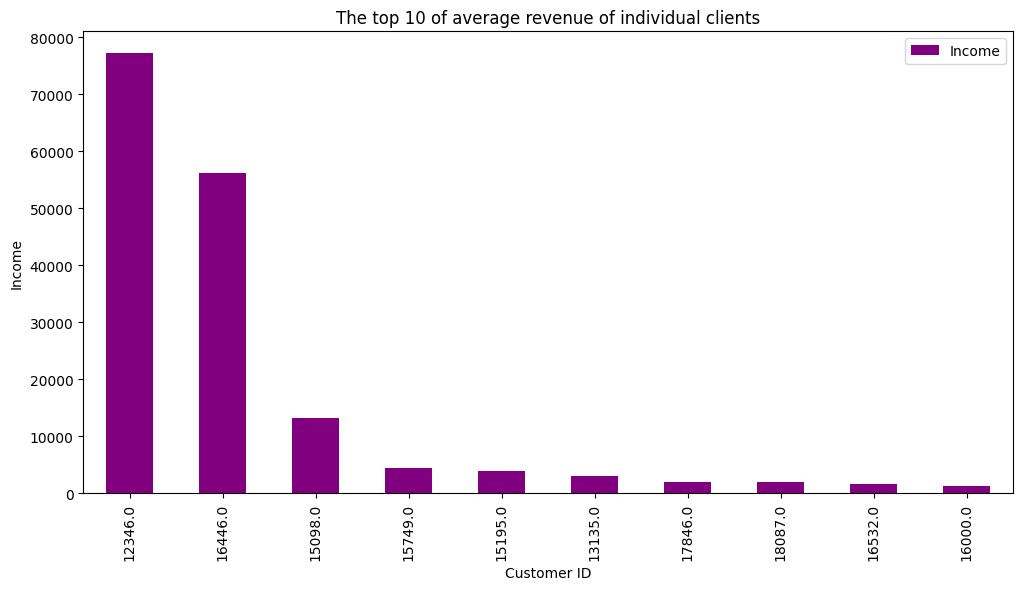

In [48]:
plt.figure(figsize=(10,6))
cust.plot(kind='bar', color='purple');
plt.title('The top 10 of average revenue of individual clients')
plt.xlabel('Customer ID')
plt.ylabel('Income')
plt.show();

Monthly Active Customers

In [49]:
monthly_active = df.groupby(['Month_year'])['CustomerID'].nunique().reset_index()
monthly_active

,Month_year,CustomerID
0,2010-12,885
1,2011-01,741
2,2011-02,758
3,2011-03,974
4,2011-04,856
5,2011-05,1056
6,2011-06,991
7,2011-07,949
8,2011-08,935
9,2011-09,1266


<Figure size 1000x500 with 0 Axes>

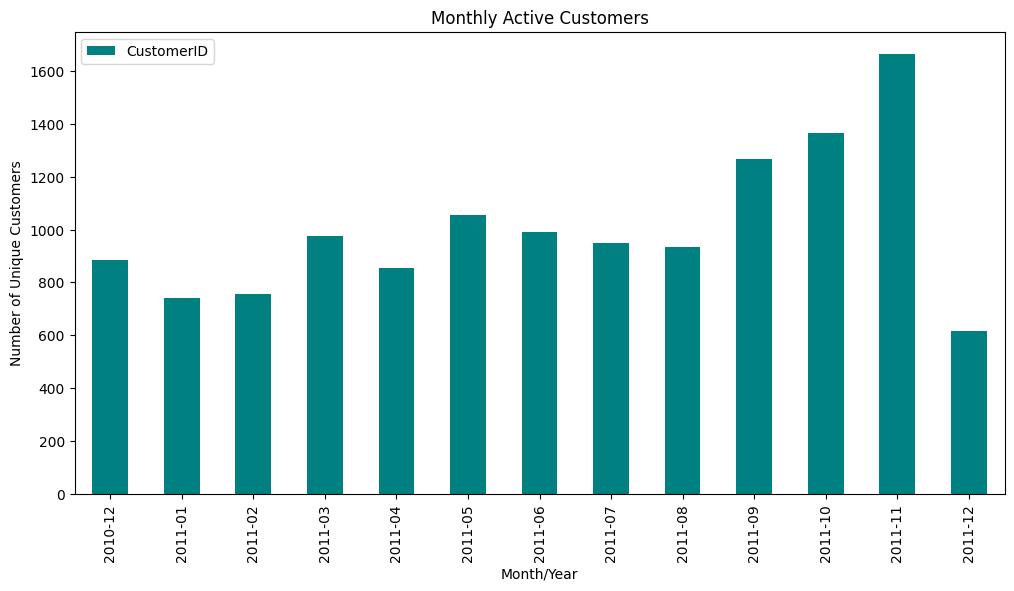

In [50]:
plt.figure(figsize=(10,5))
monthly_active.plot(kind='bar',x='Month_year',y='CustomerID', color='teal')
plt.title('Monthly Active Customers')
plt.xlabel('Month/Year')
plt.ylabel('Number of Unique Customers')
plt.xticks(rotation=90)
plt.show();

Hourly sales

In [51]:
df.groupby('Hour')['InvoiceNo'].nunique()

Hour
6        1
7       29
8      570
9     1590
10    2564
11    2642
12    3464
13    2939
14    2737
15    2668
16    1552
17     901
18     244
19     146
20      18
Name: InvoiceNo, dtype: int64

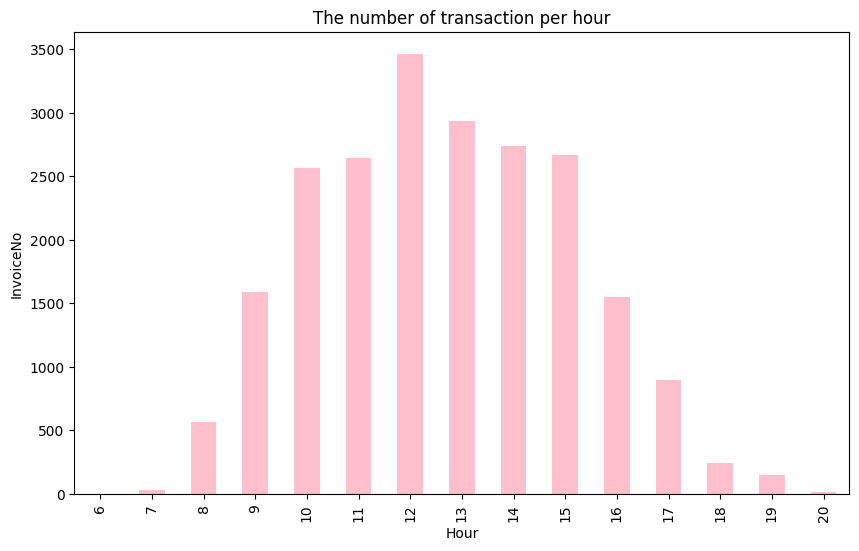

In [52]:
plt.figure(figsize=(10,6))
df.groupby('Hour')['InvoiceNo'].nunique().plot(kind='bar', color='pink')
plt.title('The number of transaction per hour')
plt.xlabel('Hour')
plt.ylabel('InvoiceNo')
plt.show();

## ***Basket analysis using Apriori algorithm:***

The Apriori algorithm is one of the most common techniques in Market Basket Analysis. It is used to analyze the frequent itemsets in a transactional database, which then is used to generate association rules between the products. The association rules exploration is based on the idea that the purchasing behavior of customers follows a pattern that can be used to sell more products to the customer in the future.

Main Concepts of Association Rules / Apriori Algorithm:
Support is an indication of how frequently the itemset appears in the dataset. This is an indication of how popular an itemset is in a dataset.

Confidence is a measure of the reliability of the rule. Is an indication of how often the rule has been found to be true. It can be said confidence says how likely item Y is purchased when item X is purchased.

Lift shows how likely item Y is purchased when item X is purchased, while controlling for how popular item Y is. In practice means is a lift value close to 1 means the rules were completely independent. Lift values > 1 are generally more “interesting” and could be indicative of a useful rule pattern.

For further analysis, we choose transactions from only one country - Netherlands:

In [53]:
data = df[df['Country'] == 'Netherlands']
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Hour,Month_year,Income
385,536403,22867,HAND WARMER BIRD DESIGN,96,2010-12-01 11:27:00,1.85,12791.0,Netherlands,2010,12,11,2010-12,177.60
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.00,12791.0,Netherlands,2010,12,11,2010-12,15.00
37952,539491,21981,PACK OF 12 WOODLAND TISSUES,12,2010-12-20 10:09:00,0.29,14646.0,Netherlands,2010,12,10,2010-12,3.48
37953,539491,21986,PACK OF 12 PINK POLKADOT TISSUES,12,2010-12-20 10:09:00,0.29,14646.0,Netherlands,2010,12,10,2010-12,3.48
37954,539491,22720,SET OF 3 CAKE TINS PANTRY DESIGN,2,2010-12-20 10:09:00,4.95,14646.0,Netherlands,2010,12,10,2010-12,9.90


In [54]:
basket = data.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().fillna(0)
basket

Description,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,SPACEBOY BABY GIFT SET,10 COLOUR SPACEBOY PEN,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,16 PIECE CUTLERY SET PANTRY DESIGN,...,WRAP RED APPLES,WRAP WEDDING DAY,YELLOW METAL CHICKEN HEART,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
539491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
539731,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,192.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
541206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
541570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578143,0.0,0.0,0.0,0.0,0.0,384.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
579528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
basket_model = basket.applymap(lambda x: 1 if x>0 else 0)
basket_model

Description,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,SPACEBOY BABY GIFT SET,10 COLOUR SPACEBOY PEN,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,16 PIECE CUTLERY SET PANTRY DESIGN,...,WRAP RED APPLES,WRAP WEDDING DAY,YELLOW METAL CHICKEN HEART,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536403,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539491,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539731,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
541206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
541570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578143,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
579528,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581175,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The most widely used library for Association Rules Learning implementations is Mlxtend so we are using that library as well.

Firstly we import Apriori algorithm and exclude products that are rare. We set the minimum support below which we cut off data from the analysis and what remains we analyze further. The support means a frequency of each product in the basket. Support is defined as the percentage of time a feature set appears in the dataset. Setting the support level high can lead to very few (or no) results and setting it too low can require a huge amount of memory to process data.

In this case we set 'min_support' on 0,07.

In [56]:
popular_sets = apriori(basket_model, min_support=0.07, use_colnames=True)

C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [57]:
popular_sets

,support,itemsets
0,0.073684,(3 HOOK HANGER MAGIC GARDEN)
1,0.073684,(36 FOIL HEART CAKE CASES)
2,0.073684,(5 HOOK HANGER RED MAGIC TOADSTOOL)
3,0.105263,(72 SWEETHEART FAIRY CAKE CASES)
4,0.073684,(BREAD BIN DINER STYLE PINK)
...,...,...
426,0.073684,"(SPACEBOY BIRTHDAY CARD, ROUND SNACK BOXES SET..."
427,0.073684,"(ROUND SNACK BOXES SET OF 4 FRUITS , STRAWBERR..."
428,0.073684,"(LUNCH BAG RED RETROSPOT, ROUND SNACK BOXES SE..."
429,0.073684,"(RED RETROSPOT CHARLOTTE BAG, ROUND SNACK BOXE..."


The last step is to build association rules using the mxltend Associations_rules function. One can set a metric ( lift or confidence) and a minimum threshold for the confidence level (min_threshold). „Min_threshold” can be taken as the percentage of confidence we want to return. For example if we set "min_threshold" to 1, we only get the rules with 100% certainty.

In [58]:
rules = association_rules(popular_sets,metric='lift',min_threshold=1)

In [59]:
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(72 SWEETHEART FAIRY CAKE CASES),(DOLLY GIRL LUNCH BOX),0.105263,0.231579,0.094737,0.900000,3.886364,0.070360,7.684211,0.830065
1,(DOLLY GIRL LUNCH BOX),(72 SWEETHEART FAIRY CAKE CASES),0.231579,0.105263,0.094737,0.409091,3.886364,0.070360,1.514170,0.966514
2,(ROUND SNACK BOXES SET OF 4 FRUITS ),(72 SWEETHEART FAIRY CAKE CASES),0.178947,0.105263,0.073684,0.411765,3.911765,0.054848,1.521053,0.906593
3,(72 SWEETHEART FAIRY CAKE CASES),(ROUND SNACK BOXES SET OF 4 FRUITS ),0.105263,0.178947,0.073684,0.700000,3.911765,0.054848,2.736842,0.831933
4,(72 SWEETHEART FAIRY CAKE CASES),(ROUND SNACK BOXES SET OF4 WOODLAND ),0.105263,0.263158,0.073684,0.700000,2.660000,0.045983,2.456140,0.697479
5,(ROUND SNACK BOXES SET OF4 WOODLAND ),(72 SWEETHEART FAIRY CAKE CASES),0.263158,0.105263,0.073684,0.280000,2.660000,0.045983,1.242690,0.846939
6,(72 SWEETHEART FAIRY CAKE CASES),(SPACEBOY LUNCH BOX ),0.105263,0.294737,0.094737,0.900000,3.053571,0.063712,7.052632,0.751634
7,(SPACEBOY LUNCH BOX ),(72 SWEETHEART FAIRY CAKE CASES),0.294737,0.105263,0.094737,0.321429,3.053571,0.063712,1.318560,0.953566
8,(CARD BIRTHDAY COWBOY),(ROUND SNACK BOXES SET OF4 WOODLAND ),0.094737,0.263158,0.073684,0.777778,2.955556,0.048753,3.315789,0.730897
9,(ROUND SNACK BOXES SET OF4 WOODLAND ),(CARD BIRTHDAY COWBOY),0.263158,0.094737,0.073684,0.280000,2.955556,0.048753,1.257310,0.897959


### Recommendations

In [60]:
rules.sort_values('lift', ascending=False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
228,(PACK OF 20 SKULL PAPER NAPKINS),(PACK OF 6 SKULL PAPER CUPS),0.073684,0.084211,0.073684,1.000000,11.875000,0.067479,inf,0.988636
1754,"(LUNCH BAG RED RETROSPOT, SPACEBOY BIRTHDAY CA...","(COWBOYS AND INDIANS BIRTHDAY CARD , PLASTERS ...",0.084211,0.073684,0.073684,0.875000,11.875000,0.067479,7.410526,1.000000
229,(PACK OF 6 SKULL PAPER CUPS),(PACK OF 20 SKULL PAPER NAPKINS),0.084211,0.073684,0.073684,0.875000,11.875000,0.067479,7.410526,1.000000
1263,"(LUNCH BAG RED RETROSPOT, SPACEBOY BIRTHDAY CARD)","(COWBOYS AND INDIANS BIRTHDAY CARD , PLASTERS ...",0.084211,0.073684,0.073684,0.875000,11.875000,0.067479,7.410526,1.000000
1771,"(COWBOYS AND INDIANS BIRTHDAY CARD , PLASTERS ...","(LUNCH BAG RED RETROSPOT, SPACEBOY BIRTHDAY CA...",0.073684,0.084211,0.073684,1.000000,11.875000,0.067479,inf,0.988636
1760,"(COWBOYS AND INDIANS BIRTHDAY CARD , ROUND SNA...","(LUNCH BAG RED RETROSPOT, SPACEBOY BIRTHDAY CARD)",0.073684,0.084211,0.073684,1.000000,11.875000,0.067479,inf,0.988636
1765,"(LUNCH BAG RED RETROSPOT, SPACEBOY BIRTHDAY CARD)","(COWBOYS AND INDIANS BIRTHDAY CARD , ROUND SNA...",0.084211,0.073684,0.073684,0.875000,11.875000,0.067479,7.410526,1.000000
1266,"(COWBOYS AND INDIANS BIRTHDAY CARD , PLASTERS ...","(LUNCH BAG RED RETROSPOT, SPACEBOY BIRTHDAY CARD)",0.073684,0.084211,0.073684,1.000000,11.875000,0.067479,inf,0.988636
1614,"(LUNCH BOX WITH CUTLERY RETROSPOT , ROUND SNAC...","(ROUND SNACK BOXES SET OF4 WOODLAND , STRAWBER...",0.073684,0.094737,0.073684,1.000000,10.555556,0.066704,inf,0.977273
1377,"(PLASTERS IN TIN VINTAGE PAISLEY , DOLLY GIRL ...","(RED RETROSPOT CHARLOTTE BAG, SPACEBOY LUNCH B...",0.073684,0.094737,0.073684,1.000000,10.555556,0.066704,inf,0.977273


In [61]:
rules[ (rules['lift'] >= 5) &
       (rules['confidence'] >= 1) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
228,(PACK OF 20 SKULL PAPER NAPKINS),(PACK OF 6 SKULL PAPER CUPS),0.073684,0.084211,0.073684,1.0,11.875000,0.067479,inf,0.988636
233,(PACK OF 60 MUSHROOM CAKE CASES),(SPACEBOY BIRTHDAY CARD),0.084211,0.178947,0.084211,1.0,5.588235,0.069141,inf,0.896552
382,"(ROUND SNACK BOXES SET OF4 WOODLAND , CHARLOTT...",(SPACEBOY BIRTHDAY CARD),0.073684,0.178947,0.073684,1.0,5.588235,0.060499,inf,0.886364
424,"(COWBOYS AND INDIANS BIRTHDAY CARD , PLASTERS ...",(LUNCH BAG RED RETROSPOT),0.073684,0.105263,0.073684,1.0,9.500000,0.065928,inf,0.965909
454,"(COWBOYS AND INDIANS BIRTHDAY CARD , PLASTERS ...",(SPACEBOY BIRTHDAY CARD),0.073684,0.178947,0.073684,1.0,5.588235,0.060499,inf,0.886364
...,...,...,...,...,...,...,...,...,...,...
1790,"(PLASTERS IN TIN VINTAGE PAISLEY , DOLLY GIRL ...","(RED RETROSPOT CHARLOTTE BAG, SPACEBOY LUNCH B...",0.073684,0.094737,0.073684,1.0,10.555556,0.066704,inf,0.977273
1792,"(PLASTERS IN TIN VINTAGE PAISLEY , DOLLY GIRL ...","(RED RETROSPOT CHARLOTTE BAG, ROUND SNACK BOXE...",0.073684,0.115789,0.073684,1.0,8.636364,0.065152,inf,0.954545
1801,"(PLASTERS IN TIN VINTAGE PAISLEY , DOLLY GIRL ...","(RED RETROSPOT CHARLOTTE BAG, SPACEBOY LUNCH B...",0.073684,0.094737,0.073684,1.0,10.555556,0.066704,inf,0.977273
1819,"(ROUND SNACK BOXES SET OF 4 FRUITS , DOLLY GIR...","(SPACEBOY LUNCH BOX , ROUND SNACK BOXES SET OF...",0.073684,0.189474,0.073684,1.0,5.277778,0.059723,inf,0.875000


In [62]:
basket_model['PLASTERS IN TIN SPACEBOY'].sum()

12

In [63]:
basket_model['SPACEBOY BIRTHDAY CARD'].sum()

17

#### ***List of recommended products***

In [64]:
products = rules.sort_values('lift', ascending=False)

In [65]:
products

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
228,(PACK OF 20 SKULL PAPER NAPKINS),(PACK OF 6 SKULL PAPER CUPS),0.073684,0.084211,0.073684,1.000000,11.875000,0.067479,inf,0.988636
1754,"(LUNCH BAG RED RETROSPOT, SPACEBOY BIRTHDAY CA...","(COWBOYS AND INDIANS BIRTHDAY CARD , PLASTERS ...",0.084211,0.073684,0.073684,0.875000,11.875000,0.067479,7.410526,1.000000
229,(PACK OF 6 SKULL PAPER CUPS),(PACK OF 20 SKULL PAPER NAPKINS),0.084211,0.073684,0.073684,0.875000,11.875000,0.067479,7.410526,1.000000
1263,"(LUNCH BAG RED RETROSPOT, SPACEBOY BIRTHDAY CARD)","(COWBOYS AND INDIANS BIRTHDAY CARD , PLASTERS ...",0.084211,0.073684,0.073684,0.875000,11.875000,0.067479,7.410526,1.000000
1771,"(COWBOYS AND INDIANS BIRTHDAY CARD , PLASTERS ...","(LUNCH BAG RED RETROSPOT, SPACEBOY BIRTHDAY CA...",0.073684,0.084211,0.073684,1.000000,11.875000,0.067479,inf,0.988636
...,...,...,...,...,...,...,...,...,...,...
56,(CHILDRENS APRON SPACEBOY DESIGN),(SPACEBOY LUNCH BOX ),0.136842,0.294737,0.084211,0.615385,2.087912,0.043878,1.833684,0.603659
106,(SPACEBOY BIRTHDAY CARD),(DOLLY GIRL LUNCH BOX),0.178947,0.231579,0.084211,0.470588,2.032086,0.042770,1.451462,0.618590
107,(DOLLY GIRL LUNCH BOX),(SPACEBOY BIRTHDAY CARD),0.231579,0.178947,0.084211,0.363636,2.032086,0.042770,1.290226,0.660959
118,(SPACEBOY LUNCH BOX ),(FAWN BLUE HOT WATER BOTTLE),0.294737,0.136842,0.073684,0.250000,1.826923,0.033352,1.150877,0.641791


In [66]:
prod_rec = products[['antecedents', 'consequents']]

#### We build final Data Frame with Products and recommendation columns.

In [67]:
prod_rec = prod_rec.rename(columns={"antecedents": "Products", "consequents": "Recommendation"})
prod_rec.head()

,Products,Recommendation
228,(PACK OF 20 SKULL PAPER NAPKINS),(PACK OF 6 SKULL PAPER CUPS)
1754,"(LUNCH BAG RED RETROSPOT, SPACEBOY BIRTHDAY CA...","(COWBOYS AND INDIANS BIRTHDAY CARD , PLASTERS ..."
229,(PACK OF 6 SKULL PAPER CUPS),(PACK OF 20 SKULL PAPER NAPKINS)
1263,"(LUNCH BAG RED RETROSPOT, SPACEBOY BIRTHDAY CARD)","(COWBOYS AND INDIANS BIRTHDAY CARD , PLASTERS ..."
1771,"(COWBOYS AND INDIANS BIRTHDAY CARD , PLASTERS ...","(LUNCH BAG RED RETROSPOT, SPACEBOY BIRTHDAY CA..."


In [68]:
# save to xlsx
prod_rec.to_csv('list_of_products.xlsx')